In [ ]:
import pandas as pd
import numpy as np
geo_df_renamed = pd.read_csv('/content/geo_final_15.csv')
geo_df_renamed

,TEKT5,ZNF154,H2AC14,BX284668.6,MYCNOS,STUM,H2BC11,PSCA,REG4,MSLN,IL37,ACTR3C,PAEP,GPR25,ISLR,os_class
0,6.883969,6.926741,6.815367,7.458589,6.764638,7.518008,6.912295,6.845317,6.691414,6.795076,6.798397,6.837794,8.915550,6.708230,6.822155,0
1,6.895341,7.273009,6.836377,7.001183,6.755737,7.021829,7.386544,7.344600,6.770619,6.809952,6.762584,6.864020,6.808243,6.740767,6.621754,2
2,6.846081,7.011308,6.659444,7.311643,6.694564,7.092837,6.887697,6.840082,6.657822,7.161264,6.741870,6.769193,6.882336,6.777802,7.228775,1
3,6.776886,7.212366,6.629701,7.067049,6.903006,7.140499,7.110033,7.171176,6.747413,6.738473,6.845686,6.642752,9.049803,6.639015,6.763471,3
4,6.885310,7.075134,6.713854,7.147230,6.810593,6.932118,7.127559,6.670939,6.663105,6.893088,6.781002,6.874069,7.116952,6.586208,6.759956,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,6.844521,6.833747,6.661131,8.094300,6.785298,6.891509,8.274167,6.903952,6.727305,6.786565,6.750896,6.793161,6.856621,6.671152,6.625635,1
206,6.963158,6.982323,6.777284,7.034112,6.806288,6.991224,7.212898,6.933486,6.643780,6.954332,6.771270,6.770719,6.745235,6.859365,6.837367,0
207,6.832622,7.060506,6.756464,7.277800,7.544937,7.160830,7.953704,6.896894,6.634401,6.780604,6.819179,6.831390,6.793975,6.767610,6.757675,1
208,6.756255,7.159379,6.890166,7.374288,6.842310,6.983384,7.036719,7.234314,6.721857,6.974669,6.927561,6.841969,7.453403,6.662003,6.807091,2


**SMOTE for class balancing**

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
# Separate the target variable and the rest of the data
X = geo_df_renamed.drop(['os_class'], axis=1)
y = geo_df_renamed['os_class']
# Apply SMOTE to oversample the minority class
smote = SMOTE(k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())
# Update X and y with the resampled data
X = X_resampled
y = y_resampled
# Create a new DataFrame with the resampled data
SMOTEDdf = pd.concat([X, y], axis=1)
SMOTEDdf

Class distribution before SMOTE:
os_class
0    76
1    70
2    34
3    30
Name: count, dtype: int64
Class distribution after SMOTE:
os_class
0    76
2    76
1    76
3    76
Name: count, dtype: int64


,TEKT5,ZNF154,H2AC14,BX284668.6,MYCNOS,STUM,H2BC11,PSCA,REG4,MSLN,IL37,ACTR3C,PAEP,GPR25,ISLR,os_class
0,6.883969,6.926741,6.815367,7.458589,6.764638,7.518008,6.912295,6.845317,6.691414,6.795076,6.798397,6.837794,8.915550,6.708230,6.822155,0
1,6.895341,7.273009,6.836377,7.001183,6.755737,7.021829,7.386544,7.344600,6.770619,6.809952,6.762584,6.864020,6.808243,6.740767,6.621754,2
2,6.846081,7.011308,6.659444,7.311643,6.694564,7.092837,6.887697,6.840082,6.657822,7.161264,6.741870,6.769193,6.882336,6.777802,7.228775,1
3,6.776886,7.212366,6.629701,7.067049,6.903006,7.140499,7.110033,7.171176,6.747413,6.738473,6.845686,6.642752,9.049803,6.639015,6.763471,3
4,6.885310,7.075134,6.713854,7.147230,6.810593,6.932118,7.127559,6.670939,6.663105,6.893088,6.781002,6.874069,7.116952,6.586208,6.759956,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,6.841284,7.200533,6.714922,7.141173,6.740221,7.320308,7.335987,6.955526,6.703837,6.876117,6.912098,6.871321,7.090799,6.750961,6.761717,3
300,6.843582,7.151671,6.688554,6.955771,6.761709,7.413939,7.097109,6.901297,6.618435,6.840784,6.801932,6.924845,7.101520,6.743733,6.806540,3
301,6.726481,6.987260,7.019023,7.479103,7.047335,6.996868,7.125307,6.866622,6.654660,6.826659,6.792767,6.960508,7.083736,6.745945,6.796549,3
302,6.826996,6.980991,6.800667,7.129558,6.806731,6.868532,7.108926,7.236122,6.612716,6.782151,6.790784,6.853602,7.458359,6.852639,6.808117,3


In [ ]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
import pandas as pd

# Combine features and target for training data
train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Save to CSV
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert scaled arrays back to DataFrames with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Save to CSV
X_train_scaled_df.to_csv("X_train_scaled.csv", index=False)
X_test_scaled_df.to_csv("X_test_scaled.csv", index=False)

**ML**

In [ ]:
##
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score,
                             classification_report, cohen_kappa_score,
                             matthews_corrcoef, precision_score, recall_score)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
# Assume df_sorted has been prepared, class created, SMOTE applied, features selected, and scaled

# Step 1: Initialize classifiers (KNN, Decision Tree, and Naive Bayes removed)
#classifiers = {
   #'Random Forest': RandomForestClassifier(random_state=42,n_estimators=1000,bootstrap=False ,max_depth=15,min_samples_split=5,min_samples_leaf=2),
   #'SVM': SVC(probability=True, random_state=42, C=10, kernel='rbf', gamma='auto'),
    #'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42,penalty='l2', solver='liblinear', C=10),
  #'Extra Trees': ExtraTreesClassifier(random_state=42, n_estimators = 500, bootstrap=True, min_samples_split=3),  # Extra Trees Classifier
   #'XGBoost': XGBClassifier(random_state=42,n_estimators=500, max_depth=10, min_child_weight=5, reg_alpha=1, reg_lambda=1)

#}
# Adding additional classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=11, min_samples_split=6, min_samples_leaf=3),
    'SVM': SVC(probability=True, random_state=42, C=10, kernel='rbf', gamma='auto'),
    #'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, penalty='l2', solver='liblinear', C=10),
    'Extra Trees': ExtraTreesClassifier(random_state=42, n_estimators=500, bootstrap=True, min_samples_split=3),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=500, max_depth=10, min_child_weight=5, reg_alpha=1, reg_lambda=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LightGBM': lgb.LGBMClassifier(random_state=42, n_estimators=500, max_depth=10, min_child_samples=20),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=500, max_depth=10),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Prepare for results
results = []
#X_train_scaled = pd.read_csv('/content/train_selected.csv')
#X_test_scaled = pd.read_csv('/content/test_selected.csv')
# Step 2: Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Loop over each classifier
for model_name, model in classifiers.items():
    acc_train_list = []
    auc_train_list = []
    sens_train_list = []
    spec_train_list = []
    mcc_train_list = []
    kappa_train_list = []

    # Cross-validation loop
    for train_index, val_index in cv.split(X_train_scaled, y_train):
        X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model.fit(X_cv_train, y_cv_train)

        # Predictions
        y_cv_val_pred = model.predict(X_cv_val)
        y_cv_val_prob = model.predict_proba(X_cv_val)

        # Metrics
        acc_train = accuracy_score(y_cv_val, y_cv_val_pred)
        auc_train = roc_auc_score(y_cv_val, y_cv_val_prob, multi_class='ovr')
        sens_train = recall_score(y_cv_val, y_cv_val_pred, average='weighted')
        spec_train = precision_score(y_cv_val, y_cv_val_pred, average='weighted')
        mcc_train = matthews_corrcoef(y_cv_val, y_cv_val_pred)
        kappa_train = cohen_kappa_score(y_cv_val, y_cv_val_pred)

        # Store metrics
        acc_train_list.append(acc_train)
        auc_train_list.append(auc_train)
        sens_train_list.append(sens_train)
        spec_train_list.append(spec_train)
        mcc_train_list.append(mcc_train)
        kappa_train_list.append(kappa_train)

    # Average metrics for training
    results.append({
        'Model': model_name,
        'Train Accuracy': np.mean(acc_train_list),
        'Train AUC': np.mean(auc_train_list),
        'Train Sensitivity': np.mean(sens_train_list),
        'Train Specificity': np.mean(spec_train_list),
        'Train MCC': np.mean(mcc_train_list),
        'Train Kappa': np.mean(kappa_train_list),
    })

    # Test the model on independent test set
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)

    # Test metrics
    acc_test = accuracy_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
    sens_test = recall_score(y_test, y_test_pred, average='weighted')
    spec_test = precision_score(y_test, y_test_pred, average='weighted')
    mcc_test = matthews_corrcoef(y_test, y_test_pred)
    kappa_test = cohen_kappa_score(y_test, y_test_pred)

    # Add testing metrics to results
    results[-1].update({
        'Test Accuracy': acc_test,
        'Test AUC': auc_test,
        'Test Sensitivity': sens_test,
        'Test Specificity': spec_test,
        'Test MCC': mcc_test,
        'Test Kappa': kappa_test,
    })

# Step 4: Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, print classification reports for test set
for result in results:
    print(f"\nClassification Report for {result['Model']} (Test):")
    print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 194, number of used features: 15
[LightGBM] [Info] Start training from score -1.396657
[LightGBM] [Info] Start training from score -1.376038
[LightGBM] [Info] Start training from score -1.396657
[LightGBM] [Info] Start training from score -1.376038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 194, number of used features: 15
[LightGBM] [Info] Start training from score -1.376038
[LightGBM] [Info] Start training from score -1.376038
[LightGBM] [Info] Start training from score -1.396657
[LightGBM] [Info] Start training from score -1.396657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 195, number of used features: 15
[LightGBM] [Info] Start training from score -1.381179
[LightGBM] [Info] Start training from score -1.381179
[LightGBM] [Info] Start training from score -1.401799
[LightGBM] [Info] Start training from score -1.381179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 195, number of used features: 15
[LightGBM] [Info] Start training from score -1.381179
[LightGBM] [Info] Start training from score -1.381179
[LightGBM] [Info] Start training from score -1.401799
[LightGBM] [Info] Start training from score -1.381179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

               Model  Train Accuracy  Train AUC  Train Sensitivity  \
0      Random Forest        0.538435   0.782555           0.538435   
1                SVM        0.567432   0.795157           0.567432   
2        Extra Trees        0.576020   0.816080           0.576020   
3            XGBoost        0.505952   0.737862           0.505952   
4                KNN        0.489286   0.731428           0.489286   
5           LightGBM        0.522619   0.766356           0.522619   
6  Gradient Boosting        0.477381   0.723541           0.477381   
7        Naive Bayes        0.300170   0.619658           0.300170   
8                MLP        0.542857   0.757114           0.542857   

   Train Specificity  Train MCC  Train Kappa  Test Accuracy  Test AUC  \
0           0.551400   0.389822     0.384567       0.508197  0.763889   
1           0.570734   0.426115     0.423301       0.557377  0.779650   
2           0.580852   0.441615     0.435050       0.508197  0.770894   
3      

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from google.colab import files

# Save results_df to a CSV file
results_df.to_csv('geo_15_904.csv', index=False)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score,
                             classification_report, cohen_kappa_score,
                             matthews_corrcoef, precision_score, recall_score)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier  # Import CatBoost

# Define classifiers including AdaBoost and CatBoost
classifiers = {
    'CatBoost': CatBoostClassifier(random_state=42, iterations=800, depth=12, learning_rate=0.2, cat_features=[], verbose=1)
    }


# Prepare for results
results = []
# Assuming X_train_selected, y_train, X_test_selected, and y_test are pre-processed and available

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over each classifier
for model_name, model in classifiers.items():
    acc_train_list = []
    auc_train_list = []
    sens_train_list = []
    spec_train_list = []
    mcc_train_list = []
    kappa_train_list = []

    # Cross-validation loop
    for train_index, val_index in cv.split(X_train_scaled, y_train):
        X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model.fit(X_cv_train, y_cv_train)

        # Predictions
        y_cv_val_pred = model.predict(X_cv_val)
        y_cv_val_prob = model.predict_proba(X_cv_val)

        # Metrics
        acc_train = accuracy_score(y_cv_val, y_cv_val_pred)
        auc_train = roc_auc_score(y_cv_val, y_cv_val_prob, multi_class='ovr')
        sens_train = recall_score(y_cv_val, y_cv_val_pred, average='weighted')
        spec_train = precision_score(y_cv_val, y_cv_val_pred, average='weighted')
        mcc_train = matthews_corrcoef(y_cv_val, y_cv_val_pred)
        kappa_train = cohen_kappa_score(y_cv_val, y_cv_val_pred)

        # Store metrics
        acc_train_list.append(acc_train)
        auc_train_list.append(auc_train)
        sens_train_list.append(sens_train)
        spec_train_list.append(spec_train)
        mcc_train_list.append(mcc_train)
        kappa_train_list.append(kappa_train)

    # Average metrics for training
    results.append({
        'Model': model_name,
        'Train Accuracy': np.mean(acc_train_list),
        'Train AUC': np.mean(auc_train_list),
        'Train Sensitivity': np.mean(sens_train_list),
        'Train Specificity': np.mean(spec_train_list),
        'Train MCC': np.mean(mcc_train_list),
        'Train Kappa': np.mean(kappa_train_list),
    })

    # Test the model on independent test set
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)

    # Test metrics
    acc_test = accuracy_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
    sens_test = recall_score(y_test, y_test_pred, average='weighted')
    spec_test = precision_score(y_test, y_test_pred, average='weighted')
    mcc_test = matthews_corrcoef(y_test, y_test_pred)
    kappa_test = cohen_kappa_score(y_test, y_test_pred)

    # Add testing metrics to results
    results[-1].update({
        'Test Accuracy': acc_test,
        'Test AUC': auc_test,
        'Test Sensitivity': sens_test,
        'Test Specificity': spec_test,
        'Test MCC': mcc_test,
        'Test Kappa': kappa_test,
    })

# Convert results to DataFrame and display
results = pd.DataFrame(results)
print(results)



0:	learn: 1.3213111	total: 526ms	remaining: 7m
1:	learn: 1.2658111	total: 1.34s	remaining: 8m 53s
2:	learn: 1.2181691	total: 2.01s	remaining: 8m 54s
3:	learn: 1.1722057	total: 2.65s	remaining: 8m 47s
4:	learn: 1.1286690	total: 3.33s	remaining: 8m 49s
5:	learn: 1.0850182	total: 4.27s	remaining: 9m 25s
6:	learn: 1.0456049	total: 5.72s	remaining: 10m 47s
7:	learn: 1.0101975	total: 6.89s	remaining: 11m 21s
8:	learn: 0.9733010	total: 7.9s	remaining: 11m 34s
9:	learn: 0.9373152	total: 8.81s	remaining: 11m 35s
10:	learn: 0.9062886	total: 8.97s	remaining: 10m 43s
11:	learn: 0.8741124	total: 9.65s	remaining: 10m 33s
12:	learn: 0.8441459	total: 10.6s	remaining: 10m 38s
13:	learn: 0.8138723	total: 10.7s	remaining: 10m 2s
14:	learn: 0.7858968	total: 11.4s	remaining: 9m 55s
15:	learn: 0.7603670	total: 12s	remaining: 9m 50s
16:	learn: 0.7351121	total: 12.7s	remaining: 9m 44s
17:	learn: 0.7100264	total: 13.7s	remaining: 9m 54s
18:	learn: 0.6867280	total: 14.4s	remaining: 9m 52s
19:	learn: 0.6646715	t

In [ ]:
from google.colab import files

# Save results_df to a CSV file
results.to_csv('geo904_15_catboost.csv', index=False)

In [ ]:
# Save as Python pickle (optional, not the recommended CatBoost way)
import joblib
joblib.dump(model, "best_catboost_model.pkl")

['best_catboost_model.pkl']

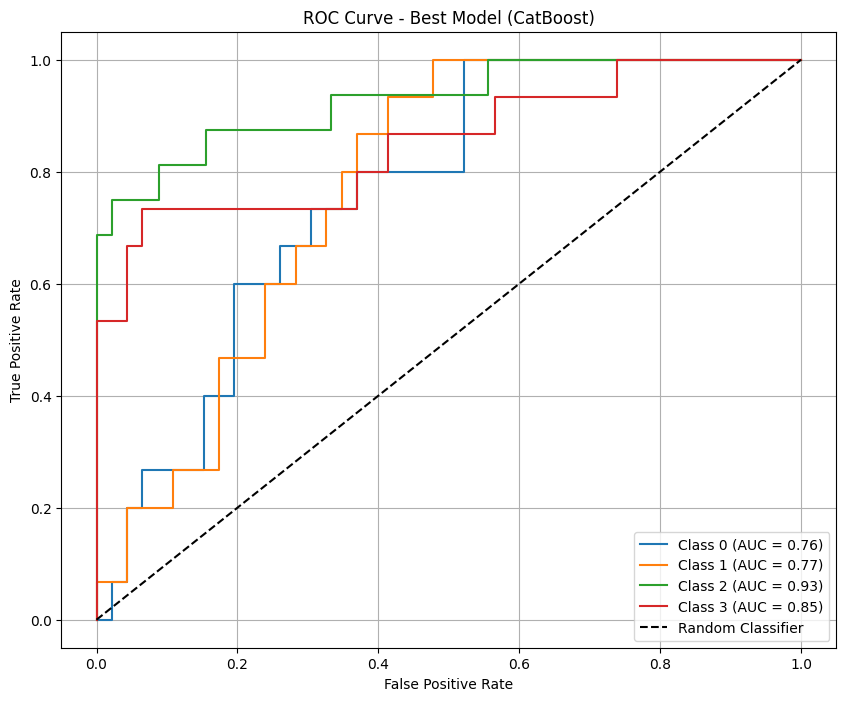

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from google.colab import files

# Get the best model (based on some metric like Test AUC)
best_model_name = results.loc[results['Test AUC'].idxmax(), 'Model']
best_model = classifiers[best_model_name]

# Predictions for the test set
y_test_prob = best_model.predict_proba(X_test_scaled)

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Best Model ({best_model_name})')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot before showing it
plt.savefig('auc_plot_geo904.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Download the saved plot
files.download('auc_plot_geo904.png')